In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
% matplotlib inline
plt.style.reload_library()
plt.style.use('ggplot')
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
import numpy as np
from scipy.io import loadmat

from core.circuit import JansenRitCircuit
from core.circuit import CircuitFromCircuit

In [4]:
# parameters
step_size = 1e-3
max_synaptic_delay = 0.15
simulation_time = 60.
conn_scaling = 100.
velocity = 2.
N = 33

# connectivity/distance matrix
Connectivity = np.zeros((N, N ,2))
Connectivity[:, :, 0] = loadmat('../tests/SC')['SC'] * conn_scaling                
Delays = loadmat('../tests/D')['D'] / velocity                       

# initialize network
circuits = [JansenRitCircuit(step_size=step_size) for i in range(N)]
JRC = CircuitFromCircuit(circuits=circuits, 
                         connectivity=Connectivity, 
                         delays=Delays)

# define input
n_timesteps = int(simulation_time/step_size)
synaptic_input = np.zeros((n_timesteps, N*3, 2))
synaptic_input[:, ::3, 0] = np.reshape(np.random.uniform(120, 320, n_timesteps*N), (n_timesteps, N))

# run simulation
JRC.run(synaptic_inputs=synaptic_input, simulation_time=simulation_time, verbose=True)

simulation progress:  0.00  %
simulation progress:  10.00  %
simulation progress:  20.00  %
simulation progress:  30.00  %
simulation progress:  40.00  %
simulation progress:  50.00  %
simulation progress:  60.00  %
simulation progress:  70.00  %
simulation progress:  80.00  %
simulation progress:  90.00  %


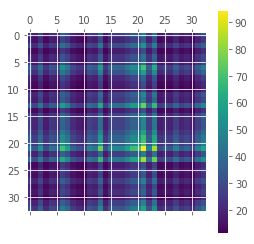

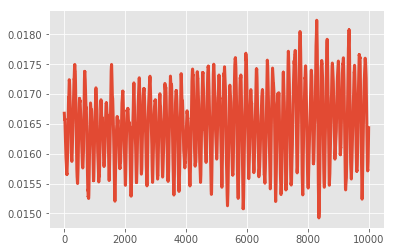

In [13]:
states = JRC.get_population_states(0)
state_cov = states[:, ::3].T @ states[:, ::3]
plt.matshow(state_cov)
plt.colorbar()
plt.figure()
plt.plot(states[60000:70000, 0])